# &#x1F9EA; **Lab &#x0033; ** 

Open RAN Advanced

###  &#x0033;  xApp Lab

This experiment is to deploy a 5G Standalone (SA) network using OpenAirInterface (OAI) 3 RF Simulator gNB and OAI minimal 5GC, using the F1 Split architecture. We also deploy FlexRIC as the Near-RT RIC with a monitoring xApp.

### &#x0033;.&#x0032; CSV Extraction

#### &#x1F5E3; Questions

#### &#x0031;. Explain the meaning of each column in the CSV file based on the SQL query.

```mysql
SELECT tstamp, ngran_node, e2node_nb_id, frame, slot, dl_aggr_tbs, dl_aggr_prb, rnti, dl_mcs1 from MAC_UE ORDER BY \
       tstamp DESC LIMIT 12000 INTO OUTFILE '/etc/t9s/athena/wmi/mysql/private/test1.csv' FIELDS TERMINATED BY ',' \
       LINES TERMINATED BY '\n';
```

These columns reference a set of parameters or fields from a MAC (Medium Access Control) message related to a User Equipment (UE) in a wireless communication system. These parameters typically represents:

1. `tstamp`: Timestamp indicating the time at which the MAC message was recorded or processed.

2. `ngran_node`: Identifier for the Next-Generation Node (NG-RAN Node) in the wireless network. This could represent a base station or another network node.

3. `e2node_nb_id`: E2 Node (E2NB) identifier. The E2 interface is part of the 5G architecture and is used for communication between gNBs (Next-Generation NodeBs).

4. `frame`: Frame number. In a wireless communication system, communication is organized into frames, each divided into slots.

5. `slot`: Slot number. Slots are subdivisions of a frame and are used to transmit data.

6. `dl_aggr_tbs`: Downlink aggregated Transport Block Size. This parameter may indicate the size of the aggregated transport blocks in the downlink (from the base station to the UE).

7. `dl_aggr_prb`: Downlink aggregated Physical Resource Blocks. This may represent the number of aggregated physical resource blocks in the downlink.

8. `rnti`: Radio Network Temporary Identifier. This is an identifier used to uniquely identify UEs within a cell.

9. `dl_mcs1`: Downlink Modulation and Coding Scheme. It represents the modulation and coding scheme used for downlink transmission.

These parameters are commonly found in the context of MAC messages exchanged between the UE and the base station (gNB in 5G). The information is crucial for managing radio resources, scheduling transmissions, and ensuring effective communication between the network and the UE.

In [45]:
using CSV
using DataFrames

In [46]:
header = (
      ["tstamp", "ngran_node", "e2node_nb_id", "frame", "slot", "dl_aggr_tbs", "dl_aggr_prb", "rnti", "dl_mcs1", "Date"]
    , ["[epoch]", "[Int64]", "[Int64]", "[m/s]", "[n]", "[m]", "[m]", "[n]", "[n]", "[yyyy-mm-ddThh:mm:ss.xxx]"]
);

In [47]:
df = DataFrame(CSV.File("data/test1.csv"));
# Set the header for the DataFrame
# DataFrames.rename!(df, header); 

In [48]:
using PrettyTables

In [49]:
using Dates

In [50]:
df.Date = map(unix2datetime, df[!,1]/1e6);

In [52]:
pretty_table(first(df, 3), backend=Val(:html), header = header, standalone=true)

tstamp,ngran_node,e2node_nb_id,frame,slot,dl_aggr_tbs,dl_aggr_prb,rnti,dl_mcs1,Date
[epoch],[Int64],[Int64],[m/s],[n],[m],[m],[n],[n],[yyyy-mm-ddThh:mm:ss.xxx]
1701873318576180,7,244022588,97,8,754856,30711,18422,9,2023-12-06T14:35:18.576
1701873318476221,7,244022588,90,12,325484963,3786730,40635,9,2023-12-06T14:35:18.476
1701873318476221,7,244022588,90,12,754733,30706,18422,9,2023-12-06T14:35:18.476


#### &#x0032;. How many slots and frames are there in the CSV file?

### &#x0034;. Which UE (based on the RNTI) is the target of the throughput test?

In [53]:
# Add columns for TBS and PRB changes
df[!, :Δₜᵦₛ] .= [diff([NaN; df[:, 6]])...]  # Assuming dl_aggr_tbs is the TBS column
df[!, :Δₚᵣᵦ] .= [diff([NaN; df[:, 7]])...];  # Assuming dl_aggr_prb is the PRB column

In [61]:
# selected_df = select(df, [:Date,Cols[6], :Δₜᵦₛ, :dl_aggr_prb, :Δₚᵣᵦ])
selected_df = select(df, [:Date,:Δₜᵦₛ, :Δₚᵣᵦ])
pretty_table(first(selected_df, 3), backend=Val(:html), standalone=true)

Date,Δₜᵦₛ,Δₚᵣᵦ
DateTime,Float64,Float64
2023-12-06T14:35:18.576,NaN,NaN
2023-12-06T14:35:18.476,3.2473e8,3.75602e6
2023-12-06T14:35:18.476,-3.2473e8,-3.75602e6


### &#x0034;. MCS Measurement

#### &#x0034;.&#x0031; Testing

#### &#x1F5E3; Questions

#### 1. Explain how the MCS value affects the TCP throughput.

In [62]:
# in  Mbits/sec 
mcs = DataFrame(CSV.File("data/mcs.csv"));

In [63]:
mcs_header = (["Index", "mean"])
pretty_table(mcs; header=mcs_header, backend=Val(:html), standalone=true)

Index,mean
9,22.4
16,40.1
24,73.0


the following test for MCS values of 9, 16, and 28 shows that more MCS values affect the TCP throughput. More data are passing through the media.

#### 2. Plot the TCP throughput for each MCS value using a barchart.

In [64]:
using Plots

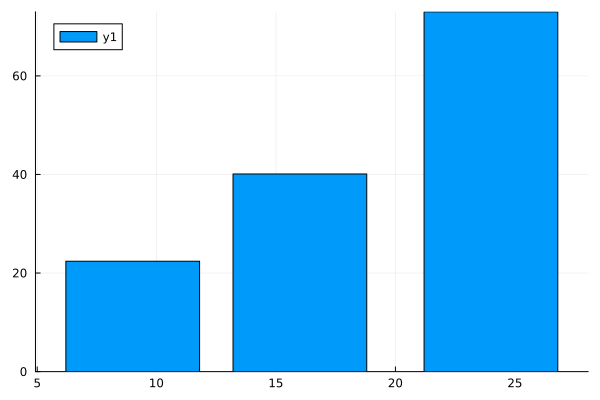

In [65]:
Plots.bar(mcs.key,mcs.value)